In [1]:
# Install JDK

!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [2]:
# Install Spark 3.3.2 and unzip folder

!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [3]:
# Setup enviroment

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

In [4]:
# Install findspark

!pip install -q findspark

import findspark
findspark.init()
findspark.find()

'/content/spark-3.3.2-bin-hadoop3'

In [5]:
# Install Pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b4a54d6b4417ac26571f292976a8b25acf77ec989ed9c2c2d115af1406bfc8b6
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [6]:
# Import library 
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, isnan, when, count, udf, year, month, to_date, mean, explode
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Create Spark Session
spark = SparkSession.builder.getOrCreate()
print(spark)

In [161]:
# Load data
df_weather = spark.read \
    .option("header", False) \
    .option("sep", ",") \
    .option("inferSchema", True) \
    .csv(path=f'/content/shanghai-weather.csv')

df_weather.printSchema()
df_weather.describe().show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)

+-------+----------+------------------+------------------+--------------------+------------------+------

In [162]:
# # Load data B
# weather_df_b = spark.read \
#     .option("header", False) \
#     .option("sep", ",") \
#     .option("inferSchema", True) \
#     .csv(path=f'/content/shanghai-b.csv')

# weather_df_b.printSchema()
# weather_df_b.describe().show()

In [163]:
# Drop column
df_weather = df_weather.drop("_c6")
df_weather = df_weather.drop("_c7")
df_weather = df_weather.drop("_c8")
df_weather = df_weather.drop("_c9")
df_weather = df_weather.drop("_c10")
df_weather = df_weather.drop("_c11")
df_weather = df_weather.drop("_c12")
df_weather = df_weather.drop("_c13")
df_weather = df_weather.drop("_c14")
df_weather = df_weather.drop("_c15")
df_weather = df_weather.drop("_c16")
df_weather = df_weather.drop("_c17")
df_weather = df_weather.drop("_c18")
df_weather = df_weather.drop("_c19")
df_weather = df_weather.drop("_c21")
df_weather = df_weather.drop("_c22")
df_weather = df_weather.drop("_c23")
df_weather = df_weather.drop("_c24")

df_weather.printSchema()
df_weather.describe().show()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c20: string (nullable = true)

+-------+----------+------------------+------------------+--------------------+------------------+------------------+------------------+
|summary|       _c0|               _c1|               _c2|                 _c3|               _c4|               _c5|              _c20|
+-------+----------+------------------+------------------+--------------------+------------------+------------------+------------------+
|  count|      2588|              2588|              2588|                2588|              2588|              2588|              2588|
|   mean|      null|21.136451488210284|14.723231542327019|0.002551217626594...| 9.548743718592993| 4.632006184770004|21.136451488210284|
| stddev|      null| 8.624790987405738| 8.180245047836593|0.049

In [88]:
# # Drop column df_b
# weather_df_b = weather_df_b.drop("_c3")
# weather_df_b = weather_df_b.drop("_c6")
# weather_df_b = weather_df_b.drop("_c7")
# weather_df_b = weather_df_b.drop("_c8")
# weather_df_b = weather_df_b.drop("_c9")
# weather_df_b = weather_df_b.drop("_c10")
# weather_df_b = weather_df_b.drop("_c11")
# weather_df_b = weather_df_b.drop("_c12")
# weather_df_b = weather_df_b.drop("_c13")
# weather_df_b = weather_df_b.drop("_c14")
# weather_df_b = weather_df_b.drop("_c15")
# weather_df_b = weather_df_b.drop("_c17")
# weather_df_b = weather_df_b.drop("_c18")
# weather_df_b = weather_df_b.drop("_c19")
# weather_df_b = weather_df_b.drop("_c20")
# weather_df_b = weather_df_b.drop("_c21")

# weather_df_b.printSchema()
# weather_df_b.describe().show()

In [164]:
# Rename Column
df_weather = df_weather.withColumnRenamed("_c0", "date") \
    .withColumnRenamed("_c1", "maxtempC") \
    .withColumnRenamed("_c2", "mintempC") \
    .withColumnRenamed("_c3", "feel") \
    .withColumnRenamed("_c4", "sunHour") \
    .withColumnRenamed("_c5", "uvIndex") \
    .withColumnRenamed("_c20", "tempC") 

df_weather.head(5)

[Row(date='date_time', maxtempC='maxtempC', mintempC='mintempC', feel='totalSnow_cm', sunHour='sunHour', uvIndex='uvIndex', tempC='tempC'),
 Row(date='2014-01-01', maxtempC='15', mintempC='5', feel='0.0', sunHour='8.7', uvIndex='4', tempC='15'),
 Row(date='2014-01-02', maxtempC='14', mintempC='7', feel='0.0', sunHour='8.7', uvIndex='4', tempC='14'),
 Row(date='2014-01-03', maxtempC='16', mintempC='9', feel='0.0', sunHour='8.7', uvIndex='4', tempC='16'),
 Row(date='2014-01-04', maxtempC='10', mintempC='4', feel='0.0', sunHour='5.5', uvIndex='2', tempC='10')]

In [74]:
# Rename multiple column
def rename_multiple_column(df, columns):
  if isinstance(columns, dict):
      return df.select(*[F.col(col_name).alias(columns.get(col_name, col_name)) for col_name in df.columns])
  else:
      raise ValueError("Column need to be in dict format {'existing_name_a': 'new_name_a, 'existing_name_b': 'new_name_b'}")
dict_columns = {"_c0": "date2",
                "_c1": "maxtempC2",
                "_c2": "mintempC2",
                "_c4": "sunHour2",
                "_c5": "uvIndex2",
                "_c20": "tempC2"
                }
df_weather = rename_multiple_column(df_weather, dict_columns)
df_weather.head(5)

[Row(date2='date', maxtempC2='maxtempC', mintempC2='mintempC', sunHour2='sunHour', uvIndex2='uvIndex', tempC2='tempC'),
 Row(date2='1/1/2014', maxtempC2='15', mintempC2='5', sunHour2='8.7', uvIndex2='4', tempC2='15'),
 Row(date2='1/2/2014', maxtempC2='14', mintempC2='7', sunHour2='8.7', uvIndex2='4', tempC2='14'),
 Row(date2='1/3/2014', maxtempC2='16', mintempC2='9', sunHour2='8.7', uvIndex2='4', tempC2='16'),
 Row(date2='1/4/2014', maxtempC2='10', mintempC2='4', sunHour2='5.5', uvIndex2='2', tempC2='10')]

In [90]:
# # Merge 2 columns of data
# spark_weather_df = weather_df_a_renamed.join(weather_df_b_renamed)

# spark_weather_df.head(5)

In [99]:
df_weather.head(5)

[Row(date='date_time', maxtempC='maxtempC', mintempC='mintempC', sunHour='sunHour', _c5='uvIndex', tempC='tempC'),
 Row(date='2014-01-01', maxtempC='15', mintempC='5', sunHour='8.7', _c5='4', tempC='15'),
 Row(date='2014-01-02', maxtempC='14', mintempC='7', sunHour='8.7', _c5='4', tempC='14'),
 Row(date='2014-01-03', maxtempC='16', mintempC='9', sunHour='8.7', _c5='4', tempC='16'),
 Row(date='2014-01-04', maxtempC='10', mintempC='4', sunHour='5.5', _c5='2', tempC='10')]

In [166]:
# Filter Null value
spark_weather_df = df_weather.filter(df_weather.maxtempC.isNotNull())
spark_weather_df.head(10)

[Row(date='date_time', maxtempC='maxtempC', mintempC='mintempC', feel='totalSnow_cm', sunHour='sunHour', uvIndex='uvIndex', tempC='tempC'),
 Row(date='2014-01-01', maxtempC='15', mintempC='5', feel='0.0', sunHour='8.7', uvIndex='4', tempC='15'),
 Row(date='2014-01-02', maxtempC='14', mintempC='7', feel='0.0', sunHour='8.7', uvIndex='4', tempC='14'),
 Row(date='2014-01-03', maxtempC='16', mintempC='9', feel='0.0', sunHour='8.7', uvIndex='4', tempC='16'),
 Row(date='2014-01-04', maxtempC='10', mintempC='4', feel='0.0', sunHour='5.5', uvIndex='2', tempC='10'),
 Row(date='2014-01-05', maxtempC='10', mintempC='3', feel='0.0', sunHour='8.7', uvIndex='3', tempC='10'),
 Row(date='2014-01-06', maxtempC='11', mintempC='5', feel='0.0', sunHour='8.7', uvIndex='3', tempC='11'),
 Row(date='2014-01-07', maxtempC='12', mintempC='9', feel='0.0', sunHour='5.5', uvIndex='3', tempC='12'),
 Row(date='2014-01-08', maxtempC='9', mintempC='4', feel='0.0', sunHour='4.0', uvIndex='2', tempC='9'),
 Row(date='201

In [169]:
# Calculate measures

maxTempC = spark_weather_df.filter(spark_weather_df.maxtempC.isNotNull()) \
  .select(mean(col('mintempC')).alias('mean_min'),
          mean(col('feel')).alias('mean_feel'),
          mean(col('sunHour')).alias('mean_sun'),
          mean(col('sunHour')).alias('mean_temp'),
          mean(col('uvIndex')).alias('mean_uv')).collect()

mean_min = maxTempC[0]['mean_min']
mean_feel = maxTempC[0]['mean_feel']
mean_sun = maxTempC[0]['mean_sun']
mean_uv = maxTempC[0]['mean_uv']

spark_weather_df = spark_weather_df \
  .na.fill(value=mean_min, subset=["mintempC"]) \
  .na.fill(value=mean_min, subset=["feel"]) \
  .na.fill(value=mean_sun, subset=["sunHour"]) \
  .na.fill(value=mean_uv, subset=["uvIndex"]) \
  .na.fill(value=mean_uv, subset=["tempC"]) \
  .na.fill(value=0, subset=["uvIndex"])

In [170]:
# check duplicates
spark_weather_df.groupby(spark_weather_df.maxtempC) \
  .count() \
  .where('count > 1') \
  .limit(5).toPandas()

,maxtempC,count
0,7,56
1,15,73
2,11,84
3,29,93
4,3,11


In [171]:
# Remove duplicate
spark_weather_df = spark_weather_df.dropDuplicates() \
    .withColumn("date", to_date(col("date"), "yyyy-MM-dd")) \
    .orderBy(col("date")) \
    .select(col("date"), col("maxtempC"), col("mintempC"), col("sunHour"), col("uvIndex"), col("tempC"))

In [172]:
# Create new columns for tempeture and for month year
# Create function to covert temp

def convertTempC(tempC):
  if tempC < "10": return "so cold"
  elif tempC > "30": return "hot" 
  else: return "normal"

udf_binner_tempC = udf(lambda x: convertTempC(x))

spark_cleaned_df = spark_weather_df \
    .withColumn("feel", udf_binner_tempC("tempC")) \
    .withColumn("month", month(spark_weather_df.date)) \
    .withColumn("year", year(spark_weather_df.date))

spark_cleaned_df.limit(5).toPandas()

,date,maxtempC,mintempC,sunHour,uvIndex,tempC,feel,month,year
0,None,maxtempC,mintempC,sunHour,uvIndex,tempC,hot,NaN,NaN
1,2014-01-01,15,5,8.7,4,15,normal,1.0,2014.0
2,2014-01-02,14,7,8.7,4,14,normal,1.0,2014.0
3,2014-01-03,16,9,8.7,4,16,normal,1.0,2014.0
4,2014-01-04,10,4,5.5,2,10,normal,1.0,2014.0


In [173]:
spark_cleaned_df.head(10)

[Row(date=None, maxtempC='maxtempC', mintempC='mintempC', sunHour='sunHour', uvIndex='uvIndex', tempC='tempC', feel='hot', month=None, year=None),
 Row(date=datetime.date(2014, 1, 1), maxtempC='15', mintempC='5', sunHour='8.7', uvIndex='4', tempC='15', feel='normal', month=1, year=2014),
 Row(date=datetime.date(2014, 1, 2), maxtempC='14', mintempC='7', sunHour='8.7', uvIndex='4', tempC='14', feel='normal', month=1, year=2014),
 Row(date=datetime.date(2014, 1, 3), maxtempC='16', mintempC='9', sunHour='8.7', uvIndex='4', tempC='16', feel='normal', month=1, year=2014),
 Row(date=datetime.date(2014, 1, 4), maxtempC='10', mintempC='4', sunHour='5.5', uvIndex='2', tempC='10', feel='normal', month=1, year=2014),
 Row(date=datetime.date(2014, 1, 5), maxtempC='10', mintempC='3', sunHour='8.7', uvIndex='3', tempC='10', feel='normal', month=1, year=2014),
 Row(date=datetime.date(2014, 1, 6), maxtempC='11', mintempC='5', sunHour='8.7', uvIndex='3', tempC='11', feel='normal', month=1, year=2014),
 

 **Visualize Chart** ☝

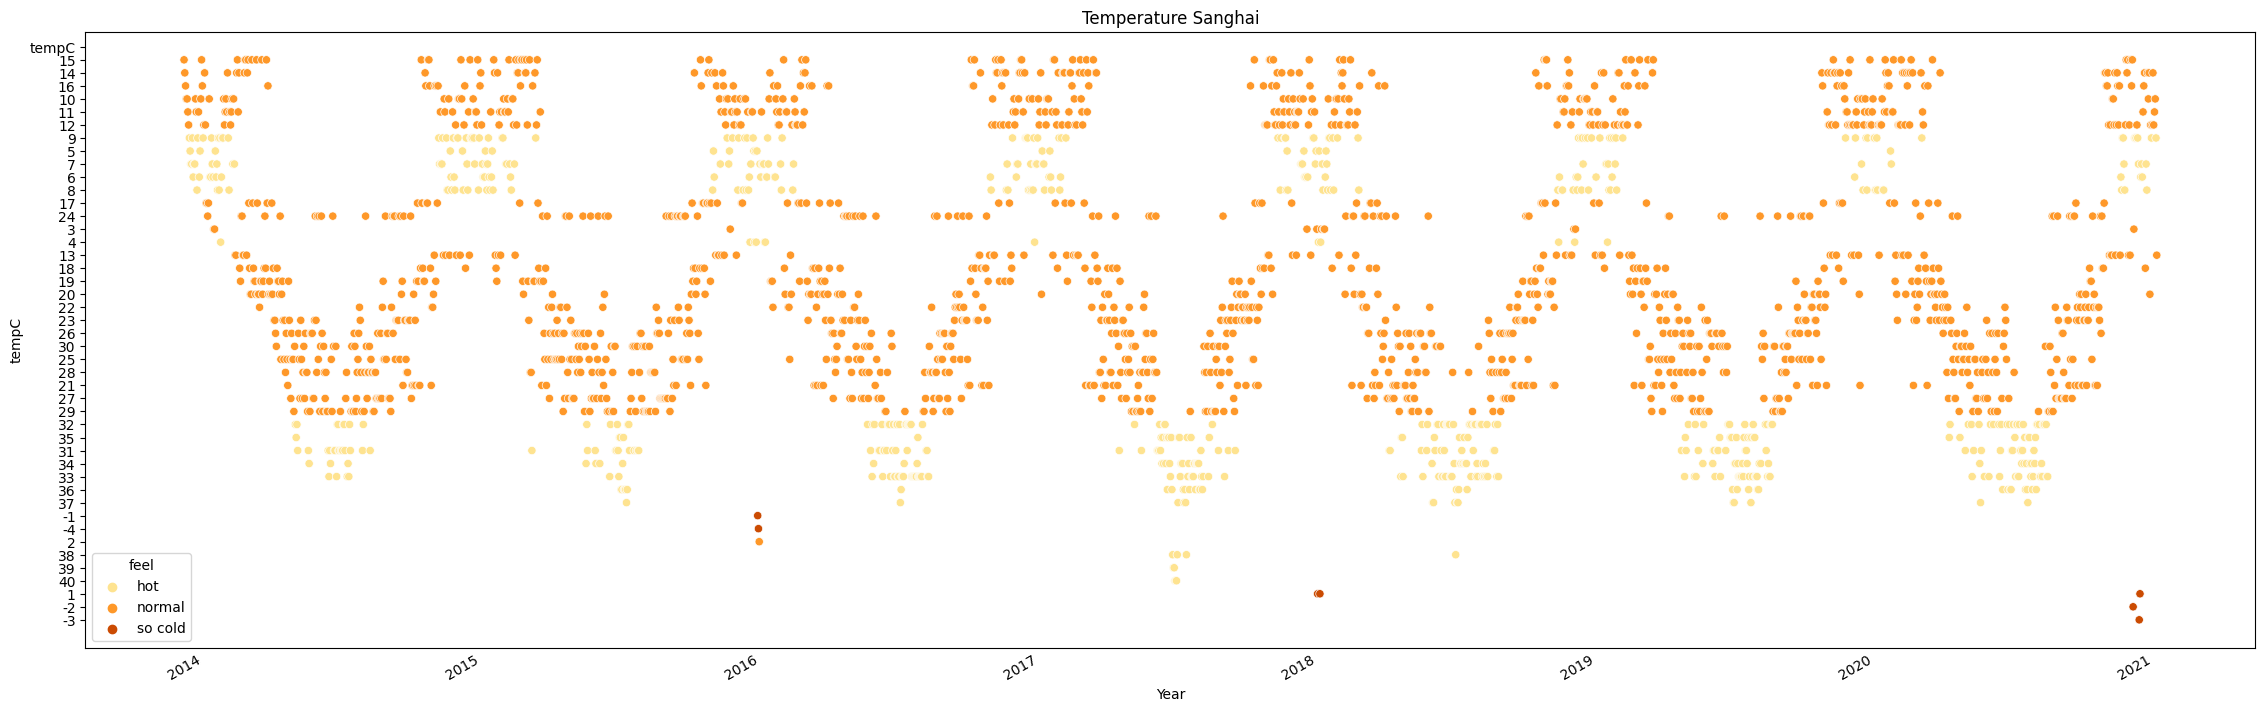

In [175]:
# Visualize the temperature in Shanghai
fig, ax = plt.subplots(figsize=(28,8))
sns.scatterplot(hue='feel', y='tempC', x='date', data=spark_cleaned_df.toPandas(), palette='YlOrBr')
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)

ax.set_title("Temperature Sanghai")
plt.xlabel('Year') 
plt.show()

Text(0.5, 1.0, 'min - max temperature seperated by month')

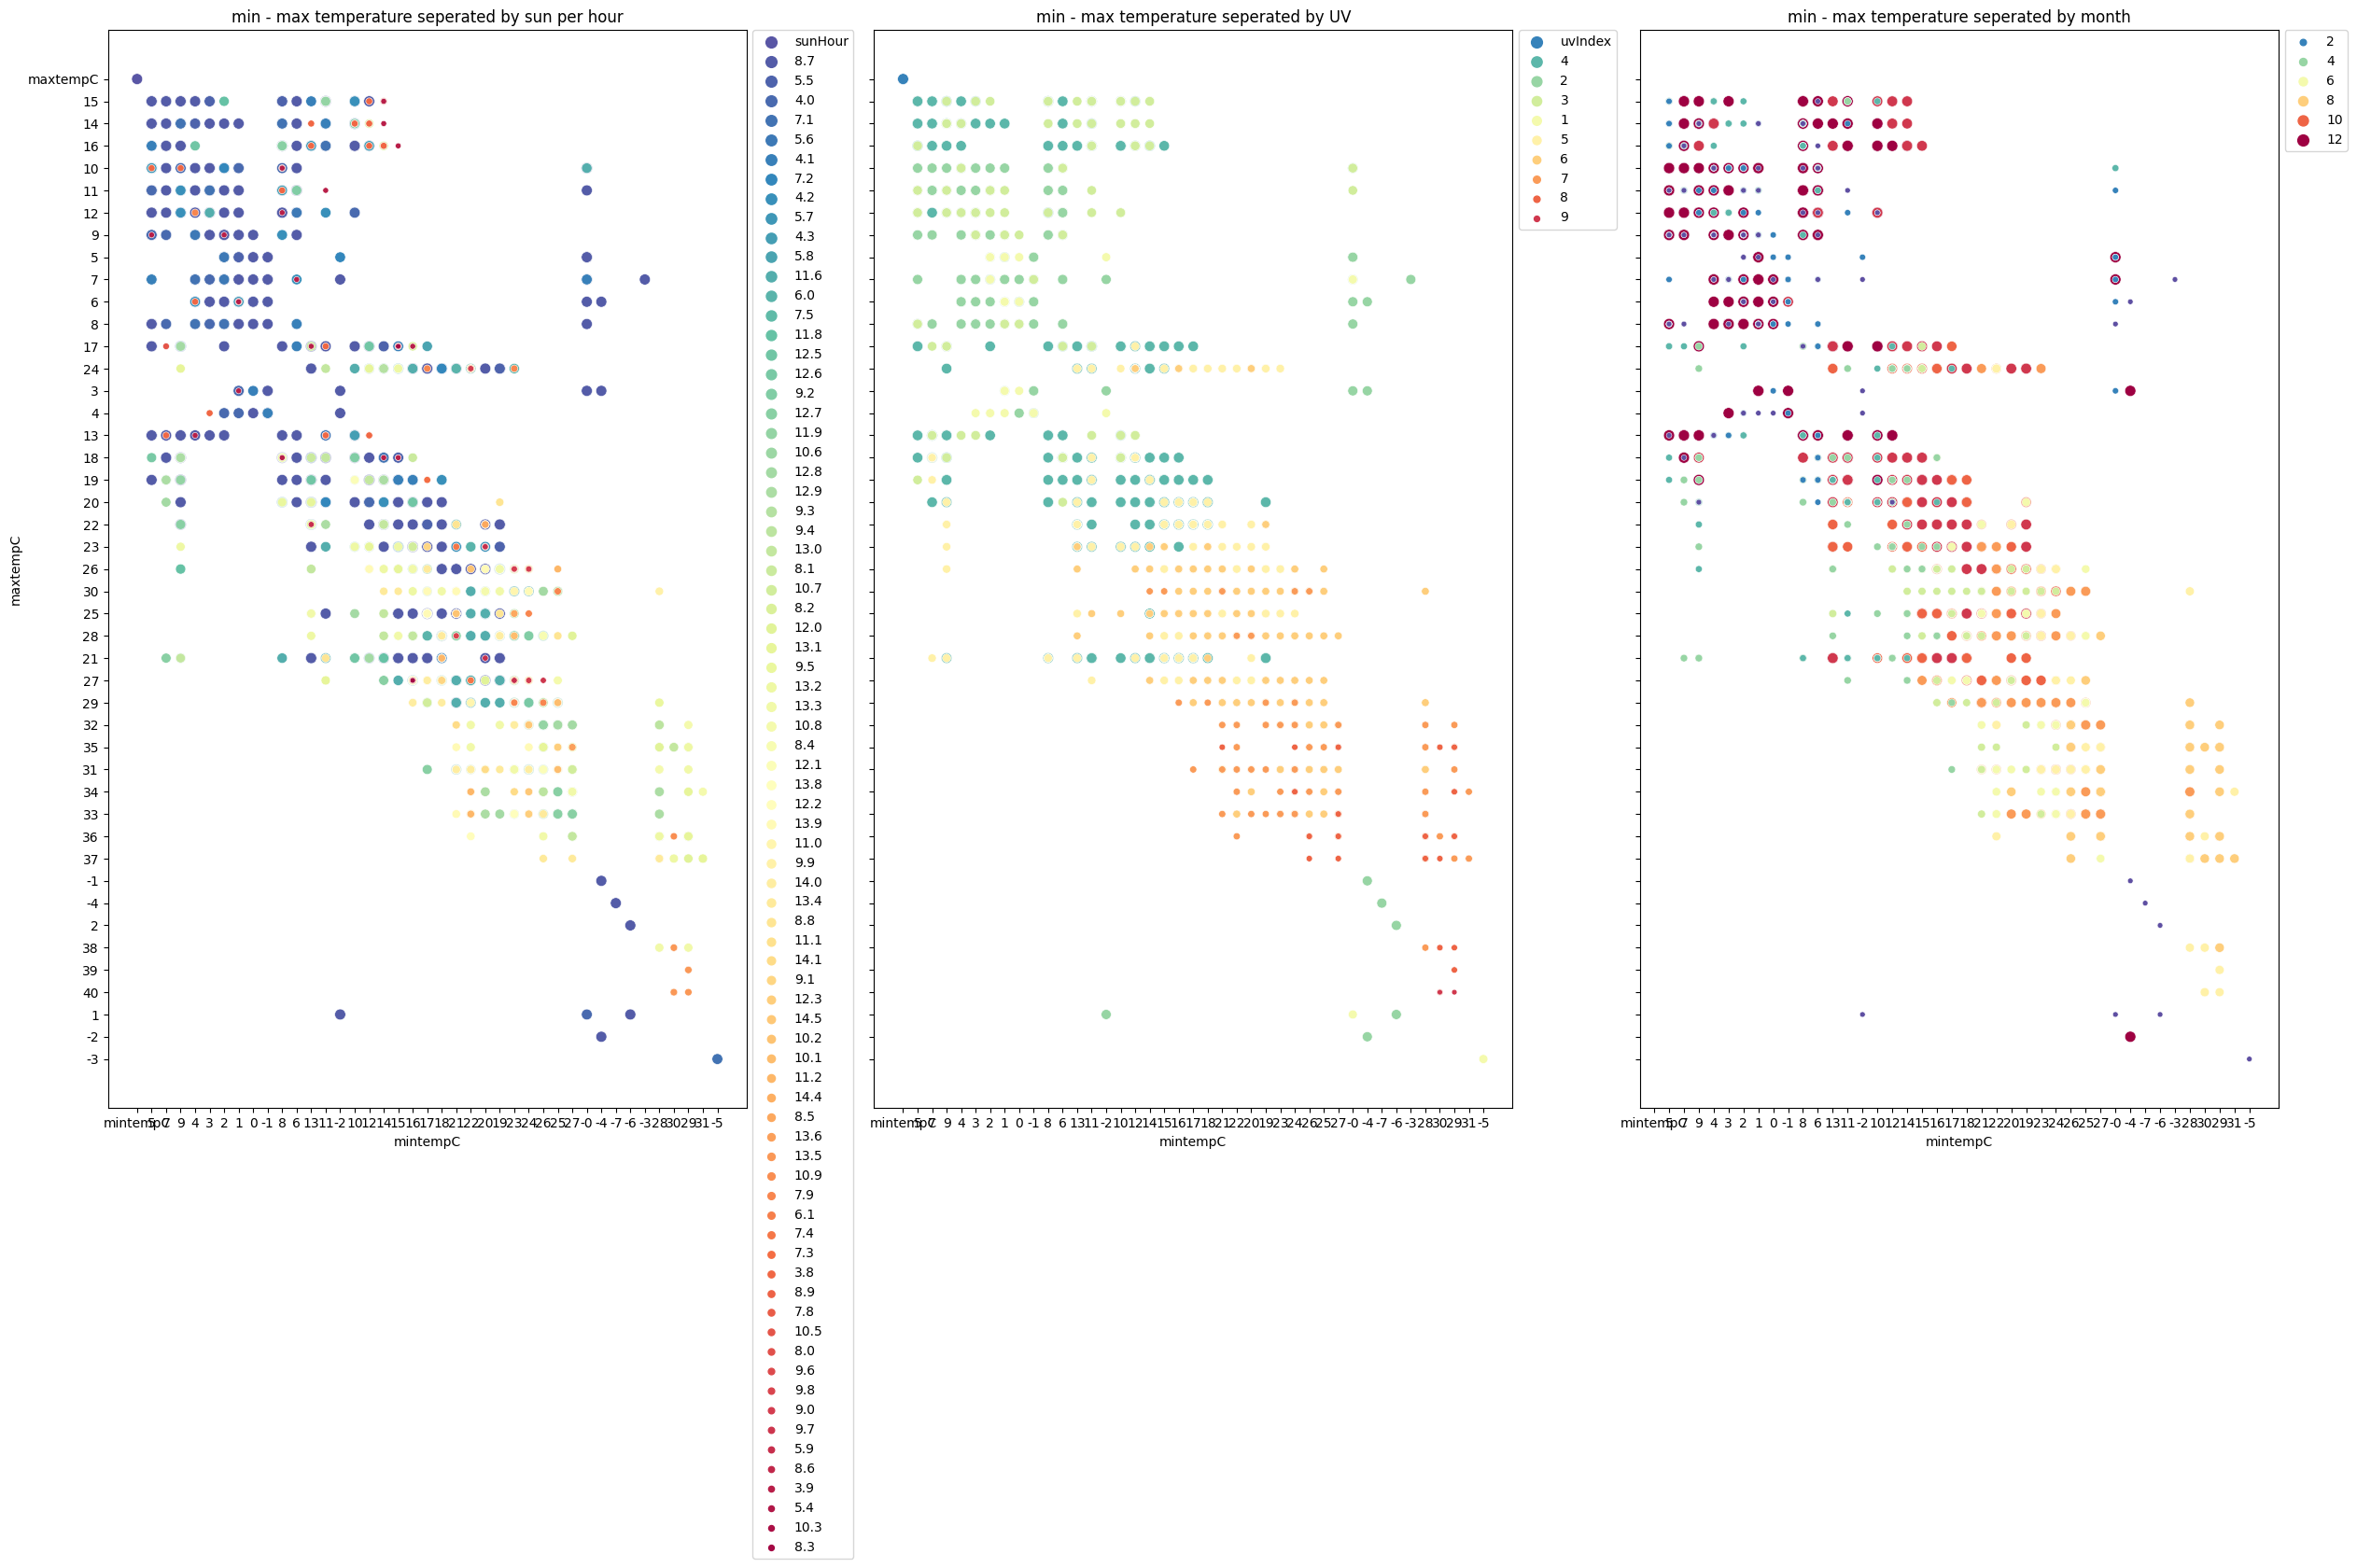

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(30,15))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.scatterplot(ax=ax[0], hue="sunHour", size="sunHour", y="maxtempC", x="mintempC", data=spark_cleaned_df.toPandas(), alpha=1.0, palette="Spectral_r")
ax[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax[0].set_title("min - max temperature seperated by sun per hour")

sns.scatterplot(ax=ax[1], hue="uvIndex", size="uvIndex", y="maxtempC", x="mintempC", data=spark_cleaned_df.toPandas(), alpha=1.0, palette="Spectral_r")
ax[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax[1].set_title("min - max temperature seperated by UV")

sns.scatterplot(ax=ax[2], hue="month", size="month", y="maxtempC", x="mintempC", data=spark_cleaned_df.toPandas(), alpha=1.0, palette="Spectral_r")
ax[2].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax[2].set_title("min - max temperature seperated by month")